### Weight Vector

#### Basic Vector Operations

In [81]:
from termcolor import colored as _col


def _red(*args, **kwargs):
    return _col(*args, **kwargs, color="red")


def _rnd(x, n=2):
    return round(x, ndigits=n)


def _deg(u, v, digits=2):
    return round(math.degrees(angle(u, v)), ndigits=digits)


In [2]:
# %load vector.py
import math


def neg(v):
    return tuple(-x for x in v)


def norm(v):
    return math.sqrt(dotprod(v, v))


def normed(v):
    n = norm(v)
    return tuple(x / n for x in v)


def add(u, v):
    return tuple(x + y for x, y in zip(u, v))


def dotprod(u, v):
    return sum(x * y for x, y in zip(u, v))


def angle(u, v):
    return math.acos(dotprod(u, v) / (norm(u) * norm(v)))


#### Calclulating a common weight vector

In [3]:
# %load weight.py
from vector import add, dotprod


def weight(u, v):
    w = add(u, v)
    while True:
        if dotprod(w, u) <= 0:
            w = add(w, u)
        elif dotprod(w, v) <= 0:
            w = add(w, v)
        else:
            return w


In [77]:
def run_weight(u, v):
    print(f"u = {u}	v = {v}	∡ uv = {_dg(u, v)}°")
    print("")
    i, w = 0, add(u, v)
    while True:
        a, b = dotprod(w, u), dotprod(w, v)
        print(f"w{i} = {w}	∡ wu = {_deg(w, u)}°	∡ wv = {_deg(w, v)}°")
        if a < 0:
            w = add(w, u)
        elif b < 0:
            w = add(w, v)
        else:
            break
        i = i + 1
    print("")
    print(f"w = {normed(w)}")


In [63]:
u, v = (4, -6), (-10, 5)
run_weight(u, v)

u = (4, -6)	v = (-10, 5)	∡ uv = 150.26°

w0 = (-6, -1)	∡ wu = 114.23°	∡ wv = 36.03°
w1 = (-2, -7)	∡ wu = 49.64°	∡ wv = 100.62°
w2 = (-12, -2)	∡ wu = 114.23°	∡ wv = 36.03°
w3 = (-8, -8)	∡ wu = 78.69°	∡ wv = 71.57°

w = (-0.7071067811865475, -0.7071067811865475)


In [64]:
u, v = (4, -7), (-3, 5)  # requires 80 iterations
u, v = (-1, -10), (4, 8)
run_weight(u, v)

u = (-1, -10)	v = (4, 8)	∡ uv = 159.15°

w0 = (3, -2)	∡ wu = 62.02°	∡ wv = 97.13°
w1 = (7, 6)	∡ wu = 136.31°	∡ wv = 22.83°
w2 = (6, -4)	∡ wu = 62.02°	∡ wv = 97.13°
w3 = (10, 4)	∡ wu = 117.51°	∡ wv = 41.63°
w4 = (9, -6)	∡ wu = 62.02°	∡ wv = 97.13°
w5 = (13, 2)	∡ wu = 104.46°	∡ wv = 54.69°
w6 = (12, -8)	∡ wu = 62.02°	∡ wv = 97.13°
w7 = (16, 0)	∡ wu = 95.71°	∡ wv = 63.43°
w8 = (15, -10)	∡ wu = 62.02°	∡ wv = 97.13°
w9 = (19, -2)	∡ wu = 89.7°	∡ wv = 69.44°

w = (0.9945054529214061, -0.10468478451804275)


In [65]:
from random import random, randint

n = 10
u, v = (randint(-n, n), randint(-n, n)), (randint(-n, n), randint(-n, n))
run_weight(u, v)

u = (1, -7)	v = (9, -6)	∡ uv = 48.18°

w0 = (10, -13)	∡ wu = 29.44°	∡ wv = 18.74°

w = (0.6097107608496923, -0.7926239891046)


#### Maximimum Number of Iterations

In [66]:
import itertools


def count_weight_iterations(u, v):
    n, w = 0, add(u, v)
    while True:
        a, b = dotprod(w, u), dotprod(w, v)
        if a < 0:
            w = add(w, u)
        elif b < 0:
            w = add(w, v)
        else:
            return n
        n = n + 1


for n in range(3, 10):
    N = range(-n + 1, n)
    M = list(itertools.product(N, N))
    R = list(itertools.product(M, M))
    k, u, v = max([(count_weight_iterations(u, v), u, v) for u, v in R])
    print(f"n = {n} ({len(R)} combinations):	max iterations = {u}	u = {u}	v = {v}	∡ uv = {_dg(u, v)}°")


n = 3 (625 combinations):	max iterations = (2, 2)	u = (2, 2)	v = (-1, -2)	∡ uv = 161.57°
n = 4 (2401 combinations):	max iterations = (3, 2)	u = (3, 2)	v = (-2, -1)	∡ uv = 172.87°
n = 5 (6561 combinations):	max iterations = (4, 3)	u = (4, 3)	v = (-3, -2)	∡ uv = 176.82°
n = 6 (14641 combinations):	max iterations = (5, 4)	u = (5, 4)	v = (-4, -3)	∡ uv = 178.21°
n = 7 (28561 combinations):	max iterations = (6, 5)	u = (6, 5)	v = (-5, -4)	∡ uv = 178.85°
n = 8 (50625 combinations):	max iterations = (7, 6)	u = (7, 6)	v = (-6, -5)	∡ uv = 179.2°
n = 9 (83521 combinations):	max iterations = (8, 7)	u = (8, 7)	v = (-7, -6)	∡ uv = 179.42°


#### Plotting Weight Iterations

In [67]:
import matplotlib.pyplot as plot


def plot_weight_iterations(u, v, size=(7, 7), t=2.75):
    fig = plot.figure()
    fig.set_size_inches(*size)
    ax = plot.axes()
    ax.set_aspect('equal')

    ax.arrow(0.0, 0.0, u[0], u[1], head_width=0.1, head_length=0.3, fc='lightblue', ec='black')
    ax.arrow(0.0, 0.0, v[0], v[1], head_width=0.1, head_length=0.3, fc='lightblue', ec='black')
    ax.annotate('u', xy=u, xytext=(u[0] + 0.1, u[1] - 0.1))
    ax.annotate('v', xy=v, xytext=(v[0] + 0.1, v[1] - 0.1))

    n, w = 1, add(u, v)
    while True:
        ax.arrow(0.0, 0.0, w[0], w[1], head_width=0.05, head_length=0.2)
        ax.annotate(n, xy=w, xytext=(w[0] + 0.05, w[1] + 0.05))
        a, b = dotprod(w, u), dotprod(w, v)
        if a < 0:
            w = add(w, u)
        elif b < 0:
            w = add(w, v)
        else:
            break
        n = n + 1

    ax.arrow(0.0, 0.0, w[0], w[1], width=0.01, head_width=0.1, head_length=0.3, fc='red', ec='red')
    #     ax.annotate('w', xy=w, xytext=(w[0] + 0.05, w[1] + 0.05))

    plot.grid()
    plot.xlim(-t, t)
    plot.ylim(-t, t)

    plot.title(f"Weight vector calulated after {n} Iterations")
    plot.show()
    

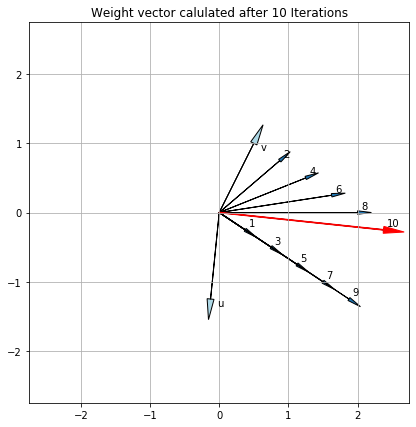

In [68]:
u, v = (-0.5, -1.2), (1.1, 1.2)
u, v = (-0.7, -1.2), (1.1, 1.2)
u, v = (4/5, -7/5), (-3/5, 5/5)
u, v = (-1/8, -10/8), (4/8, 8/8)
plot_weight_iterations(u, v)

### The Perceptron

#### Activation Functions

In [69]:
# %load activation_function.py
"""Numerically stable version of sigmoid::

    def sigmoid(x):
        if x >= 0:
            return 1.0 / (1.0 + math.exp(-x))
        y = math.exp(x)
        return y / (1 + y)

"""

import math


def heaviside(x):
    return 0 if x < 0.0 else 1


def linear(x, a=1.0):
    return a * x


def dx_linear(_, a=1.0):
    return a


def sigmoid(x):
    return 1.0 / (1.0 + math.exp(-x))


def dx_sigmoid(x):
    return sigmoid(x) * (1 - sigmoid(x))


tanh = math.tanh


def dx_tanh(x):
    return 1 - tanh(x) ** 2


#### Perceptron Implementation

In [70]:
# %load perceptron.py
from vector import dotprod


def perceptron(T, t=0.01, epochs=50):
    n = len(T[0])
    w, b = n * (0.0,), 0.0
    for _ in range(epochs):
        done = True
        for x, y in T:
            if dotprod(w, x) + b >= 0:
                z = 1
            else:
                z = 0
            w = tuple(w[i] - t * (z - y) * x[i] for i in range(n))
            b = b - t * (z - y)
            if not y == z:
                done = False
        if done:
            break
    return w, b


In [134]:
def run_perceptron(f, T, t=0.01, epochs=50):
    w, b = perceptron(T, t=t, epochs=epochs)
    p = lambda x: heaviside(dotprod(w, x) + b)
    if all(p(x) == y for x, y in T):
        print(f"{f.__name__}: ok")
    else:
        print(_red(f"{f.__name__}: failed"))
    for x, y in T:
        if p(x) == y:
            print(f"    {f.__name__}{x} = {y}")
        else:
            print(_red(f"    {f.__name__}{x} = {y} ≠ {p(x)}"))


#### Approximation of Boolean Operators

In [144]:
# %load boolean.py

def AND(x, y):
    return int(x and y)


def OR(x, y):
    return int(x or y)


def NAND(x, y):
    return int(not x and not y)


def XOR(x, y):
    return int(x and not y or not x and y)


BOOLEAN_OPERATORS = AND, OR, NAND, XOR
BOOLEAN_OPERATOR_DOMAIN = (0, 0), (0, 1), (1, 0), (1, 1)
BOOLEAN_TESTDATA = [(f, [(x, f(*x)) for x in BOOLEAN_OPERATOR_DOMAIN]) for f in BOOLEAN_OPERATORS]
SEPARABLE_BOOLEAN_OPERATORS = AND, OR, NAND
NON_SEPARABLE_BOOLEAN_OPERATORS = XOR


In [145]:
t, epochs = 0.01, 50
for f, T in BOOLEAN_TESTDATA:
    run_perceptron(f, T, t=t, epochs=epochs)
    

AND: ok
    AND(0, 0) = 0
    AND(0, 1) = 0
    AND(1, 0) = 0
    AND(1, 1) = 1
OR: ok
    OR(0, 0) = 0
    OR(0, 1) = 1
    OR(1, 0) = 1
    OR(1, 1) = 1
NAND: ok
    NAND(0, 0) = 1
    NAND(0, 1) = 0
    NAND(1, 0) = 0
    NAND(1, 1) = 0
XOR: failed
    XOR(0, 0) = 0 ≠ 1
    XOR(0, 1) = 1
    XOR(1, 0) = 1 ≠ 0
    XOR(1, 1) = 0


### The Delta Rule

   #### Delta Rule Implementation

In [82]:
# %load delta_rule.py
from random import random
from vector import dotprod


def delta_rule(T, a, da, t=0.01, epochs=50):
    n = len(T[0])
    w, b = n * (random(),), random()
    for _ in range(epochs):
        for x, y in T:
            z = dotprod(w, x) + b
            az, daz = a(z), da(z)
            d = y - az
            w = tuple(w[i] + t * d * daz * x[i] for i in range(n))
            b = b + t * d * daz
    return w, b


In [120]:
def delta_rule_approx(T, a, da, t=0.01, epochs=50):
    w, b = delta_rule(T, a=a, da=da, t=t, epochs=epochs)
    return lambda x: dotprod(w, x) + b


def run_delta_rule(f, T, a, da, fire, t=0.01, epochs=50):
    r = delta_rule_approx(T, a, da, t=t, epochs=epochs)
    p = lambda x: fire(r(x))
    if all(p(x) == y for x, y in T):
        print(f"{f.__name__}: ok")
    else:
        print(_red(f"{f.__name__}: failed"))
    for x, y in T:
        z = p(x)
        if z == y:
            print(f"    {f.__name__}{x} = {y}	a(wx+b) = {_rnd(a(r(x)), n=2)}")
        else:
            print(_red(f"    {f.__name__}{x} = {y} ≠ {z}	a(wx+b) = {_rnd(a(r(x)), n=2)}"))


#### Approximation of Boolean Operators

In [140]:
t, epochs = 0.01, 2500
for f, T in BOOLEAN_TESTDATA:
    run_delta_rule(f, T, a=sigmoid, da=dx_sigmoid, fire=heaviside, t=t, epochs=epochs)


AND: ok
    AND(0, 0) = 0	a(wx+b) = 0.12
    AND(0, 1) = 0	a(wx+b) = 0.31
    AND(1, 0) = 0	a(wx+b) = 0.31
    AND(1, 1) = 1	a(wx+b) = 0.59
OR: ok
    OR(0, 0) = 0	a(wx+b) = 0.42
    OR(0, 1) = 1	a(wx+b) = 0.79
    OR(1, 0) = 1	a(wx+b) = 0.79
    OR(1, 1) = 1	a(wx+b) = 0.95
NAND: ok
    NAND(0, 0) = 1	a(wx+b) = 0.58
    NAND(0, 1) = 0	a(wx+b) = 0.21
    NAND(1, 0) = 0	a(wx+b) = 0.21
    NAND(1, 1) = 0	a(wx+b) = 0.05
XOR: failed
    XOR(0, 0) = 0	a(wx+b) = 0.46
    XOR(0, 1) = 1 ≠ 0	a(wx+b) = 0.49
    XOR(1, 0) = 1 ≠ 0	a(wx+b) = 0.49
    XOR(1, 1) = 0 ≠ 1	a(wx+b) = 0.53


In [137]:
def athird(x, s=0.3):
    if abs(x) <= s:
        return 0
    elif abs(1 - x) < s:
        return 1
    return x


# def athird(x, s=0.01):
#     return int(x >= s)


def limited_linear(x):
    if x > 1:
        return 1
    elif x < -1:
        return -1
    return x


def gt0(x, s=0.3):
    return int(x >= s)


def gt(s=0.5):
    return lambda x: int(x >= s)


t, epochs = 0.01, 5000
for f, T in BOOLEAN_TESTDATA:
    a = lambda x: linear(x, a=s)
    da = lambda x: dx_linear(x, a=s)
    run_delta_rule(f, T, a=linear, da=dx_linear, fire=gt(0.5), t=t, epochs=epochs)


AND: ok
    AND(0, 0) = 0	a(wx+b) = -0.25
    AND(0, 1) = 0	a(wx+b) = 0.25
    AND(1, 0) = 0	a(wx+b) = 0.25
    AND(1, 1) = 1	a(wx+b) = 0.76
OR: ok
    OR(0, 0) = 0	a(wx+b) = 0.25
    OR(0, 1) = 1	a(wx+b) = 0.75
    OR(1, 0) = 1	a(wx+b) = 0.75
    OR(1, 1) = 1	a(wx+b) = 1.24
NAND: ok
    NAND(0, 0) = 1	a(wx+b) = 0.75
    NAND(0, 1) = 0	a(wx+b) = 0.25
    NAND(1, 0) = 0	a(wx+b) = 0.25
    NAND(1, 1) = 0	a(wx+b) = -0.24
XOR: failed
    XOR(0, 0) = 0 ≠ 1	a(wx+b) = 0.51
    XOR(0, 1) = 1 ≠ 0	a(wx+b) = 0.5
    XOR(1, 0) = 1 ≠ 0	a(wx+b) = 0.49
    XOR(1, 1) = 0	a(wx+b) = 0.49


In [138]:
t, epochs = 0.01, 5000
for s in [0.5, 1.0, 2.0, 5.0]:
    print(f"s = {s}")
    for f, T in BOOLEAN_TESTDATA:
        a, da = lambda x: linear(x, a=s), lambda x: dx_linear(x, a=s)
        r = delta_rule_approx(T, a, da, t=t, epochs=epochs)
        p = lambda x: gt()(r(x))
        if all(p(x) == y for x, y in T):
            print(f"    {f.__name__}: ok")
        else:
            print(_red(f"    {f.__name__}: failed"))


s = 0.5
    AND: failed
    OR: failed
    NAND: failed
    XOR: failed
s = 1.0
    AND: ok
    OR: ok
    NAND: ok
    XOR: failed
s = 2.0
    AND: failed
    OR: failed
    NAND: failed
    XOR: failed
s = 5.0
    AND: failed
    OR: failed
    NAND: failed
    XOR: failed


In [139]:
t, epochs = 0.01, 5000
for f, T in BOOLEAN_TESTDATA:
    a = lambda x: linear(x, a=s)
    da = lambda x: dx_linear(x, a=s)
    run_delta_rule(f, T, a=linear, da=dx_linear, fire=gt(0.5), t=t, epochs=epochs)


AND: ok
    AND(0, 0) = 0	a(wx+b) = -0.25
    AND(0, 1) = 0	a(wx+b) = 0.25
    AND(1, 0) = 0	a(wx+b) = 0.25
    AND(1, 1) = 1	a(wx+b) = 0.76
OR: ok
    OR(0, 0) = 0	a(wx+b) = 0.25
    OR(0, 1) = 1	a(wx+b) = 0.75
    OR(1, 0) = 1	a(wx+b) = 0.75
    OR(1, 1) = 1	a(wx+b) = 1.24
NAND: ok
    NAND(0, 0) = 1	a(wx+b) = 0.75
    NAND(0, 1) = 0	a(wx+b) = 0.25
    NAND(1, 0) = 0	a(wx+b) = 0.25
    NAND(1, 1) = 0	a(wx+b) = -0.24
XOR: failed
    XOR(0, 0) = 0 ≠ 1	a(wx+b) = 0.51
    XOR(0, 1) = 1 ≠ 0	a(wx+b) = 0.5
    XOR(1, 0) = 1 ≠ 0	a(wx+b) = 0.49
    XOR(1, 1) = 0	a(wx+b) = 0.49


In [141]:
t, epochs = 0.01, 500
for f, T in BOOLEAN_TESTDATA:
    run_delta_rule(f, T, a=tanh, da=dx_tanh, fire=gt0, t=t, epochs=epochs)


AND: ok
    AND(0, 0) = 0	a(wx+b) = -0.23
    AND(0, 1) = 0	a(wx+b) = 0.24
    AND(1, 0) = 0	a(wx+b) = 0.24
    AND(1, 1) = 1	a(wx+b) = 0.62
OR: ok
    OR(0, 0) = 0	a(wx+b) = 0.11
    OR(0, 1) = 1	a(wx+b) = 0.84
    OR(1, 0) = 1	a(wx+b) = 0.84
    OR(1, 1) = 1	a(wx+b) = 0.98
NAND: ok
    NAND(0, 0) = 1	a(wx+b) = 0.56
    NAND(0, 1) = 0	a(wx+b) = 0.22
    NAND(1, 0) = 0	a(wx+b) = 0.22
    NAND(1, 1) = 0	a(wx+b) = -0.17
XOR: failed
    XOR(0, 0) = 0 ≠ 1	a(wx+b) = 0.47
    XOR(0, 1) = 1	a(wx+b) = 0.5
    XOR(1, 0) = 1	a(wx+b) = 0.5
    XOR(1, 1) = 0 ≠ 1	a(wx+b) = 0.53


In [142]:
def check_boolean_operator(f, a, da, fire, t=0.01, epochs=50, repetitions=1):
    T = [(x, f(*x)) for x in BOOLEAN_OPERATOR_DOMAIN]
    r = delta_rule_approx(T, a, da, t=t, epochs=epochs)
    p = lambda x: fire(r(x))
    for _ in range(repetitions):
        if not all(p(x) == y for x, y in T):
            return False
    return True
        


def check_boolean_operators(a, da, fire, t=0.01, epochs=50, repetitions=1):
    return all(check_boolean_operator(f, a, da, fire, t=t, epochs=epochs, repetitions=repetitions) 
               for f in SEPARABLE_BOOLEAN_OPERATORS)


In [152]:
a, da, fire = sigmoid, dx_sigmoid, heaviside
repetitions = 20

T = [0.01, 0.05, 0.1, 0.5]
E = [50, 100, 200, 250, 500, 2000, 5000]

for t, epochs in itertools.product(T, E):
    if check_boolean_operators(a, da, fire, t=t, epochs=epochs, repetitions=repetitions):
        print(f"step length = {t} epochs = {epochs}: ok")
    else:
        print(_red(f"step length = {t} epochs = {epochs}: failed"))


step length = 0.01 epochs = 50: failed
step length = 0.01 epochs = 100: failed
step length = 0.01 epochs = 200: failed
step length = 0.01 epochs = 250: failed
step length = 0.01 epochs = 500: failed
step length = 0.01 epochs = 2000: ok
step length = 0.01 epochs = 5000: ok
step length = 0.05 epochs = 50: failed
step length = 0.05 epochs = 100: failed
step length = 0.05 epochs = 200: failed
step length = 0.05 epochs = 250: failed
step length = 0.05 epochs = 500: ok
step length = 0.05 epochs = 2000: ok
step length = 0.05 epochs = 5000: ok
step length = 0.1 epochs = 50: failed
step length = 0.1 epochs = 100: failed
step length = 0.1 epochs = 200: failed
step length = 0.1 epochs = 250: ok
step length = 0.1 epochs = 500: ok
step length = 0.1 epochs = 2000: ok
step length = 0.1 epochs = 5000: ok
step length = 0.5 epochs = 50: ok
step length = 0.5 epochs = 100: ok
step length = 0.5 epochs = 200: ok
step length = 0.5 epochs = 250: ok
step length = 0.5 epochs = 500: ok
step length = 0.5 epochs =